In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [5]:
path = 'D:\\data_venv\\salesreport\\'
os.listdir(path) #list the contents of the directory

['sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

# CLEAN AND PROCESS DATA

## 1 - MERGE 12-MONTH DATA

In [8]:
## The data for each month was saved in separate files, and we need to reconcile them into one file
path = 'D:\\data_venv\\salesreport\\'
filepaths = []
frames = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = os.path.join(path, file)  # Use os.path.join to create the full path
        filepaths.append(filepath)
        df1 = pd.read_csv(filepath)  # Read each CSV file into df1
        frames.append(df1)  # Append df1 to the frames list

result = pd.concat(frames, ignore_index=True)  # Concatenate all DataFrames in the frames list
result.to_csv('annualSales2019.csv', index=False)  # Save the concatenated DataFrame to a single CSV file
df = result
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


## 2 - CLEAN DATA

In [32]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## BUSINESS QUESTION

### QUESTION 1: WHAT WAS THE BEST MONTH FOR SALES? HOW MUCH WAS EARNED THAT MONTH?

In [34]:
# Add new column 'month' to calculate sales by month
df.loc[:, 'month'] = df['Order Date'].str.slice(0, 2)
print(set(df['month']))

{'11', '03', '08', '10', '05', '06', '09', '02', '04', '07', '01', '12'}


In [33]:
# After detecting redundancy in month, we will go on removing them
df = df[df['month'] != 'Or']
print(set(df['month']))

{'11', '03', '08', '10', '05', '06', '09', '02', '04', '07', '01', '12'}


In [13]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

# Create the 'Sales' column by multiplying the two numeric columns
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Display the first 10 rows to check the result
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [15]:
# Move column 'Sales' to your desired location
column_to_move = df.pop("Sales")
# insert column with insert(location, column_name, column_value)
df.insert(4, "Sales", column_to_move)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## VISUALIZATION

In [18]:
# Calculate the 'Sales' column by multiplying 'Quantity Ordered' and 'Price Each'
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Group the DataFrame by 'month' and calculate the sum of sales for each month
monthly_revenue = df.groupby('month')['Sales'].sum().reset_index()

# Find the row with the highest sales
highest_sales_row = monthly_revenue[monthly_revenue['Sales'] == monthly_revenue['Sales'].max()]

# Extract the month and sales value from the row
highest_sales_month_name = highest_sales_row['month'].values[0]
highest_sales_value = highest_sales_row['Sales'].values[0]

# Display the result
print(f"The month with the highest sales is {highest_sales_month_name} with total sales of ${highest_sales_value:.2f}")

The month with the highest sales is 12 with total sales of $4613443.50


<function matplotlib.pyplot.show(close=None, block=None)>

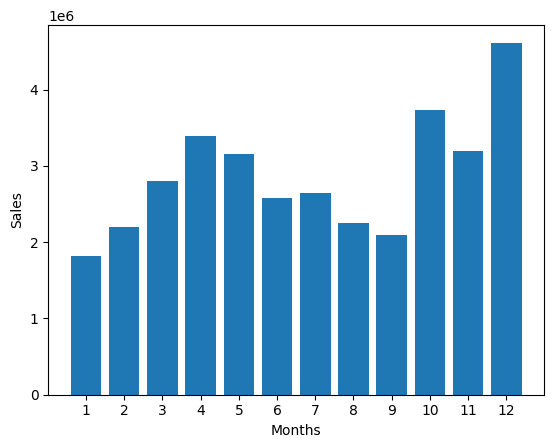

In [31]:
sales_value = df.groupby('month').sum()['Sales']
months = range(1,13)
plt.bar(x = months, height = sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show

### QUESTION 2: WHAT CITY HAS THE BEST REVENUE?

In [35]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [37]:
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [39]:
sales_values_city = df.groupby('City').sum()['Sales']
sales_values_city.max()

8262204.0

## VISUALIZATION

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


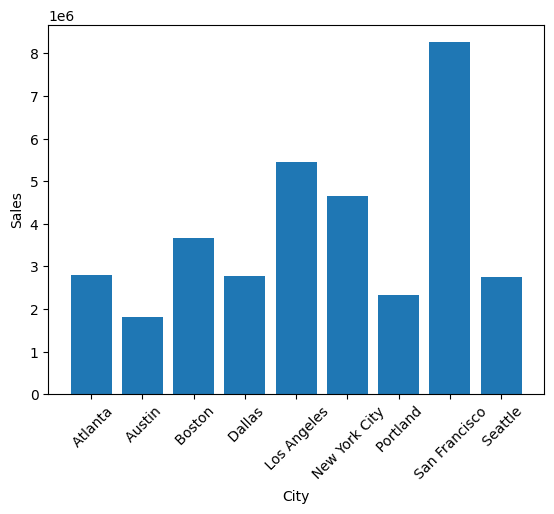

In [41]:
cities = []
for city, sales in sales_values_city.items():
    cities.append(city)
print(cities)
list(set(df['City']))  # Convert the set to a list
plt.bar(x=cities, height=sales_values_city)
plt.xlabel('City')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()

### QUESTION 3: WHICH HOUR PRODUCT ARE SOLD THE MOST? WHY DO YOU THINK IT IS SOLD THE MOST?

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

In [46]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City,Hour
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


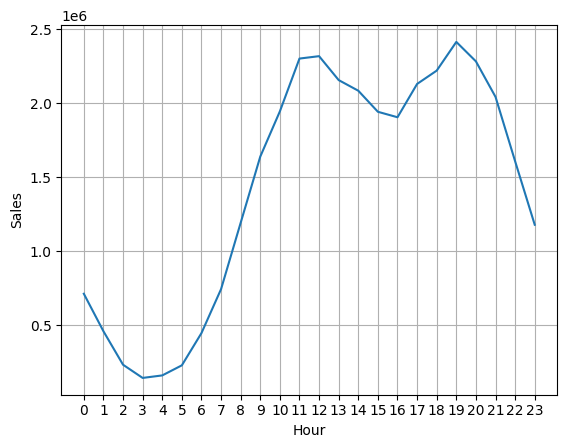

In [47]:
sales_values_hour = df.groupby('Hour')['Sales'].sum()
hours = [
hour for hour, sales in sales_values_hour.items()]
list(set(df['Hour']))  # Convert the set to a list
plt.plot(hours, sales_values_hour)
# Set the x-axis ticks to show every value of the hour
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show()

- As can be seen, the products are sold the most at 11 am and 8 p.m. We can run targeted promotions, advertisements, or social media campaigns during these times to attract more customers.
- 11 AM is typically around lunchtime in many regions. The peak at this hour could indicate that our products are popular choices for lunch, whether it's for dining in or takeout. It may be worthwhile to offer lunchtime specials or promotions to capitalize on this trend.
- Ensure that business has an appropriate number of staff members available during these peak hours to provide efficient service. Proper staffing and operations during busy times are essential to meet customer demand.

### QUESTION 4: WHAT PRODUCT ARE MOST OFTEN SOLD TOGETHER?

In [49]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City,Hour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [50]:
groupProduct = lambda product: ', '.join(product)

In [51]:
# Use groupby and transform to create a new Series with aggregated 'Product' values
agg_products = df_dup.groupby('Order ID')['Product'].transform(groupProduct)

# Create a new DataFrame with the aggregated 'Product' values
df_modified = df_dup.copy()  # Create a copy of the original DataFrame
df_modified['All Products'] = agg_products
df_modified.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City,Hour,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [52]:
df_dup2 = df_modified[['Order ID', 'All Products']].drop_duplicates()
df_dup2.head()

,Order ID,All Products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


In [53]:
df_dup2['All Products'].value_counts().head(10)

All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

In [55]:
products_sold = df.groupby('Product')['Quantity Ordered'].sum()
products_sold = products_sold.sort_values(ascending=False)
print(products_sold)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


In [56]:
# Convert the 'Price Each' column to strings
df['Price Each'] = df['Price Each'].astype(str)

# Remove non-numeric characters from the 'Price Each' column
df['Price Each'] = df['Price Each'].str.replace(r'[^0-9.]', '', regex=True)

# Convert the 'Price Each' column to a numeric data type
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Calculate the mean of 'Price Each' for each product
prices = df.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


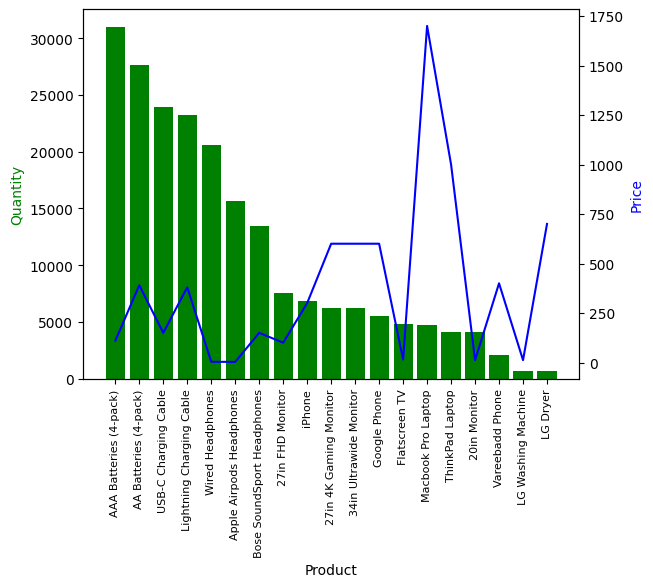

In [60]:
import matplotlib.pyplot as plt

x = product_ls
y1 = products_sold
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticks(range(len(product_ls)))  # Set the tick locations explicitly
ax1.set_xticklabels(product_ls, rotation=90, size=8)
ax1.set_xlabel('Product')  # Set x-axis label for the first axis
ax1.set_ylabel('Quantity', color='g')  # Set y-axis label for the first axis
ax2.set_ylabel('Price', color='b')  # Set y-axis label for the second axis

plt.show()